# ImageRecorder
A [ImageRecorder](api.rst#ipywebrtc.webrtc.ImageRecorder) allows you to record a screenshot from any stream object, e.g. from:
 
 * [VideoStream](api.rst#ipywebrtc.webrtc.VideoStream)
 * [WidgetStream](api.rst#ipywebrtc.webrtc.WidgetStream)
 * [CameraStream](api.rst#ipywebrtc.webrtc.CameraStream)

In [1]:
import ipywidgets as widgets
from ipywebrtc import ImageRecorder, VideoStream

In [2]:
video = VideoStream.from_url('Big.Buck.Bunny.mp4')
video

VideoStream(video=Video(value=b'Big.Buck.Bunny.mp4', format='url'))

Using the image recorder, you can take screenshot of the stream clicking the camera button

In [3]:
image_recorder = ImageRecorder(stream=video)
image_recorder

ImageRecorder(image=Image(value=b''), stream=VideoStream(video=Video(value=b'Big.Buck.Bunny.mp4', format='url'…

In [4]:
image_recorder.image

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01d\x08\x06\x00\x00\x00\xb0\xf0\x8a…

Or do it, programatically:

In [ ]:
image_recorder.recording = True

In [ ]:
image_recorder.autosave = False

In [ ]:
image_recorder.download()

In [ ]:
image_recorder.image.height

The data is PNG encoded (by default), so we show how to use PIL to read in the data

In [5]:
import PIL.Image
import PIL.ImageFilter
import io
im = PIL.Image.open(io.BytesIO(image_recorder.image.value))

PIL Images display by default as image in the notebook. Calling the filter methods returns a new image which gets displayed directly.

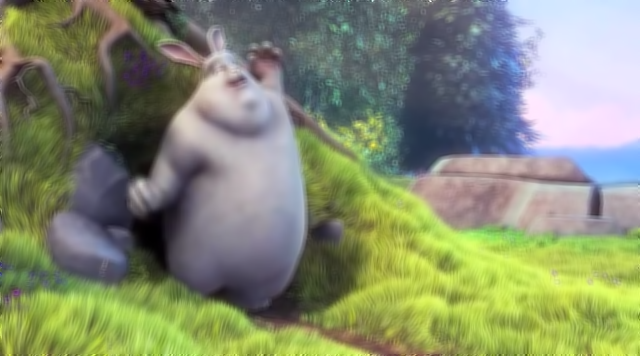

In [6]:
im.filter(PIL.ImageFilter.BLUR)

## Example with scikit image
We first convert the png encoded data to raw pixel values (as a numpy array).

In [7]:
import numpy as np
im_array = np.array(im)
im_array

array([[[141, 127, 142, 255],
        [134, 120, 134, 255],
        [119, 105, 117, 255],
        ..., 
        [205, 226, 255, 255],
        [205, 226, 255, 255],
        [205, 226, 255, 255]],

       [[139, 124, 138, 255],
        [131, 116, 129, 255],
        [115, 100, 111, 255],
        ..., 
        [205, 226, 255, 255],
        [205, 226, 255, 255],
        [205, 226, 255, 255]],

       [[130, 115, 127, 255],
        [123, 109, 119, 255],
        [107,  93, 101, 255],
        ..., 
        [205, 226, 255, 255],
        [205, 226, 255, 255],
        [205, 226, 255, 255]],

       ..., 
       [[ 99,  99,  48, 255],
        [ 99, 100,  45, 255],
        [100, 102,  41, 255],
        ..., 
        [171, 200,  71, 255],
        [149, 178,  51, 255],
        [156, 184,  60, 255]],

       [[ 99,  98,  52, 255],
        [ 98,  98,  48, 255],
        [100, 101,  44, 255],
        ..., 
        [172, 202,  72, 255],
        [156, 185,  58, 255],
        [155, 183,  59, 255]],

       

Now we can do easy manipulatios, such as reordering the channels (red, green, blue, alpha)

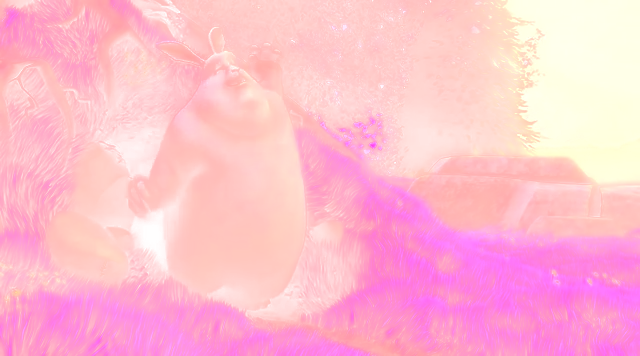

In [8]:
PIL.Image.fromarray(im_array[...,::-1])

Or build a slightly more sophisticated example using scikit-image (run this notebook with a live kernel, such as mybinder for this to work)

In [9]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.color import rgb2gray
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


image = widgets.Image()
output = widgets.Output()
filter_options = [('roberts', roberts), ('sobel', sobel), ('scharr', scharr), ('prewitt', prewitt)]
filter_widget = widgets.ToggleButtons(options=filter_options)

@output.capture()
def update_image(change):
    # turn into nparray
    im_in = PIL.Image.open(io.BytesIO(image_recorder.image.value))
    im_array = np.array(im_in)[...,:3] # no alpha
    
    # filter
    filter_function = filter_widget.value
    im_array_edges = adapt_rgb(each_channel)(filter_function)(im_array)
    im_array_edges = ((1-im_array_edges) * 255).astype(np.uint8)
    im_out = PIL.Image.fromarray(im_array_edges)
    
    # store in image widget
    f = io.BytesIO()
    im_out.save(f, format='png')
    image.value = f.getvalue()

image_recorder.image.observe(update_image, 'value')
filter_widget.observe(update_image, 'value')
widgets.VBox([filter_widget, video, widgets.HBox([image_recorder, image]), output])